# Machine Learning

### Credit Card Fraud Detection 

V= value of the transaction

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
cc=pd.read_csv('creditcard.csv')

In [20]:
cc.shape

(284807, 31)

In [21]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
cc.Class.sum()

492

In [23]:
cc.Class.sum()/cc.shape[0]

0.001727485630620034

In [24]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
Xc=cc.drop('Class',axis=1)
yc=cc['Class']

In [26]:
Xc=Xc.drop('Time',axis=1)

In [27]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc,test_size=0.4, random_state=10)

In [28]:
yc_test.sum()

190

In [29]:
yc_train.sum()

302

In [30]:
num_trees=[10,20]

In [31]:
from tqdm import tqdm

In [32]:
Xc_train.shape

(170884, 29)

In [33]:
lrc=LogisticRegression().fit(Xc_train,yc_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import f1_score

In [35]:
f1_score(yc_test,lrc.predict(Xc_test))

0.7261904761904762

In [36]:
dtc=DecisionTreeClassifier(max_depth=4).fit(Xc_train,yc_train)

In [37]:
f1_score(yc_test,dtc.predict(Xc_test))

0.7875354107648724

In [38]:
dtcbig=DecisionTreeClassifier().fit(Xc_train,yc_train)

##### Warning: Below takes crazy long! Be careful!!!

In [39]:
from tqdm import tqdm

In [40]:
num_trees=[20,50,80]

In [41]:
cvres=[]
for num in tqdm(num_trees):
    rf_cv_clf = RandomForestClassifier(n_estimators = num, max_features='sqrt',max_depth=4,random_state=0)
    cvclf = cross_validate(rf_cv_clf, Xc_train, yc_train, cv=5, scoring='f1')
    cvres.append(cvclf['test_score'].mean())

100%|██████████| 3/3 [03:15<00:00, 65.22s/it]


In [42]:
cvres

[0.7765487294211344, 0.7829141838553604, 0.7749965094984714]

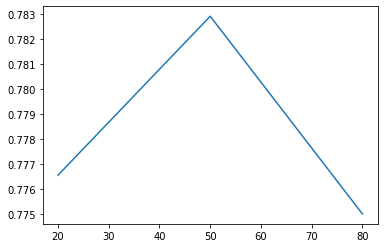

In [43]:
plt.plot(num_trees,cvres)

In [44]:
rfc=RandomForestClassifier(n_estimators = 50, max_features='sqrt',
                           max_depth=4,random_state=0).fit(Xc_train,yc_train)

In [45]:
f1_score(yc_test,rfc.predict(Xc_test))

0.81437125748503

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(yc_test,rfc.predict(Xc_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113733
           1       0.94      0.72      0.81       190

    accuracy                           1.00    113923
   macro avg       0.97      0.86      0.91    113923
weighted avg       1.00      1.00      1.00    113923



fp:we say fraud and it's not 
fn:we say NO FRAUD and it is Fraud

In [49]:
pd.crosstab(yc_test,rfc.predict(Xc_test))

col_0,0,1
Class,,
0,113725,8
1,54,136


In [50]:
new_rfc_pred = rfc.predict_proba(Xc_test)[:,1] > .25

In [51]:
pd.crosstab(yc_test,new_rfc_pred)

col_0,False,True
Class,,
0,113709,24
1,35,155


In [52]:
f1_score(yc_test,new_rfc_pred)

0.8401084010840109

In [53]:
from sklearn.metrics import precision_recall_curve

In [54]:
precision, recall, thresholds = precision_recall_curve(yc_test,rfc.predict_proba(Xc_test)[:,1])

Text(0, 0.5, 'Recall')

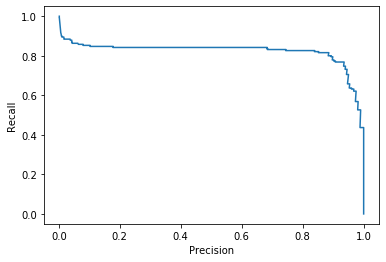

In [55]:
plt.plot(precision,recall,label='rf')
plt.xlabel('Precision')
plt.ylabel('Recall')

In [56]:
max(thresholds)

0.9550621387284187

In [57]:
pt=np.argmin(np.abs(thresholds-0.5))

In [58]:
pt

1263

In [59]:
precision[pt]

0.9448275862068966

Text(0, 0.5, 'Recall')

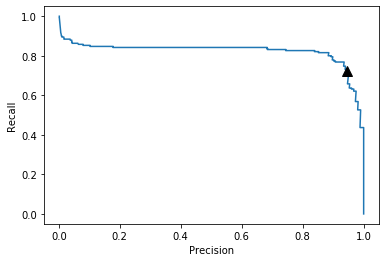

In [60]:
plt.plot(precision,recall,label='rf')
plt.plot(precision[pt],recall[pt],'^',c='k',markersize=10)
plt.xlabel('Precision')
plt.ylabel('Recall')


In [61]:
newpt=np.argmin(np.abs(thresholds-0.25))

Text(0, 0.5, 'Recall')

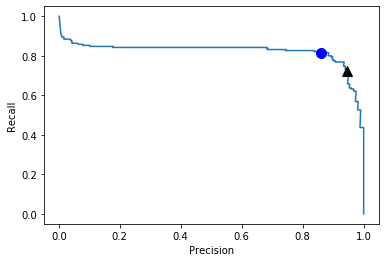

In [62]:
plt.plot(precision,recall,label='rf')
plt.plot(precision[pt],recall[pt],'^',c='k',markersize=10)
plt.plot(precision[newpt],recall[newpt],'o',c='b',markersize=10)
plt.xlabel('Precision')
plt.ylabel('Recall')

In [63]:
from sklearn.metrics import roc_curve

In [64]:
fpr, tpr, thresholds = roc_curve(yc_test,rfc.predict_proba(Xc_test)[:,1])

In [65]:
pt=np.argmin(np.abs(thresholds-0.5))
newpt=np.argmin(np.abs(thresholds-0.25))
thirdpt=np.argmin(np.abs(thresholds-0.0001))

Text(0, 0.5, 'TPR (Recall)')

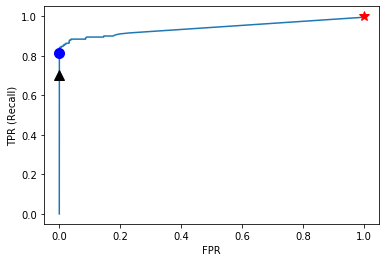

In [66]:
plt.plot(fpr,tpr,label='rf')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

In [67]:
from sklearn.metrics import average_precision_score, roc_auc_score

In [68]:
average_precision_score(yc_test,rfc.predict_proba(Xc_test)[:,1])

0.8236157900559355

In [69]:
roc_auc_score(yc_test,rfc.predict_proba(Xc_test)[:,1])

0.9403586747724472

In [70]:
lrfpr, lrtpr, lrthresholds = roc_curve(yc_test,lrc.predict_proba(Xc_test)[:,1])

Text(0, 0.5, 'TPR (Recall)')

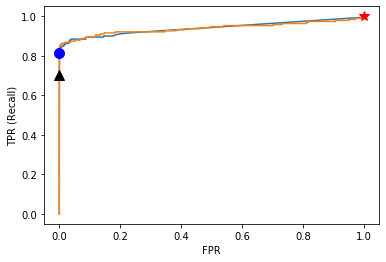

In [71]:
plt.plot(fpr,tpr,label='rf')
plt.plot(lrfpr,lrtpr,label='lr')
plt.plot(fpr[pt],tpr[pt],'^',c='k',markersize=10)
plt.plot(fpr[newpt],tpr[newpt],'o',c='b',markersize=10)
plt.plot(fpr[thirdpt],tpr[thirdpt],'*',c='r',markersize=10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

In [72]:
lr_precision, lr_recall, thresholds = precision_recall_curve(yc_test,lrc.predict_proba(Xc_test)[:,1])

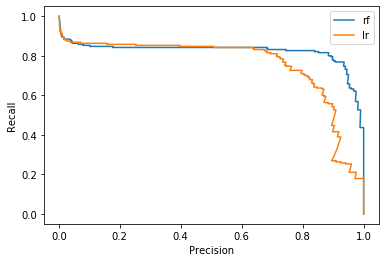

In [73]:
plt.plot(precision,recall,label='rf')
plt.plot(lr_precision,lr_recall,label='lr')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

In [74]:
cc.shape

(284807, 31)